In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'ticks')
%matplotlib inline

# Bank Marketing Dataset

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## We have two datasets:
- bank-full.csv with all examples (41188) and 20 inputs
- bank.csv with 10% of the examples (4119), randomly selected from bank-full, and 20 inputs.

In [2]:
bank_full = pd.read_csv('bank-full.csv', sep = ';')
bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank = pd.read_csv('bank.csv', sep = ';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
bank_full.shape
bank.shape

(41188, 21)

(4119, 21)

## Let's combine both

I will combine both to preprocess all the features

In [5]:
def df_combined():
    combined = bank_full.append(bank)
    combined.reset_index(inplace = True)
    combined.drop('index', inplace = True, axis = 1)
    
    return combined

data = df_combined()
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data.shape

(45307, 21)

## Preprocessing data

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Our data is divided into 5 sections, separated in bank client data, related to the last contact of the current campaign, other attributes and social and economic context attributes. Throughout the process we let's discuss what means each section.

- 0 - 6 : bank client data
- 7 - 10 : related with the last contact of the current campaign
- 11 - 14 : other atributes
- 15 - 19 : social and economic context attributes
- 20 : target

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45307 non-null  int64  
 1   job             45307 non-null  object 
 2   marital         45307 non-null  object 
 3   education       45307 non-null  object 
 4   default         45307 non-null  object 
 5   housing         45307 non-null  object 
 6   loan            45307 non-null  object 
 7   contact         45307 non-null  object 
 8   month           45307 non-null  object 
 9   day_of_week     45307 non-null  object 
 10  duration        45307 non-null  int64  
 11  campaign        45307 non-null  int64  
 12  pdays           45307 non-null  int64  
 13  previous        45307 non-null  int64  
 14  poutcome        45307 non-null  object 
 15  emp.var.rate    45307 non-null  float64
 16  cons.price.idx  45307 non-null  float64
 17  cons.conf.idx   45307 non-null 

In [9]:
#function to rename the data of each column

def dict_x(dict, column_name):
    data[column_name].replace(dict, inplace = True)
    data[column_name] = data[column_name].astype('category')
    data.dropna(inplace = True)

> ### Bank Client Data

The first thing to do is to change the attribute job, education and marital, because your data has some issues that may hinder us in the future to make machine learning model. Also, we let's change the default, housing and loan attributes, because it's with categorical data worst for us, so it's better changing to numerical (0 or 1).

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown'

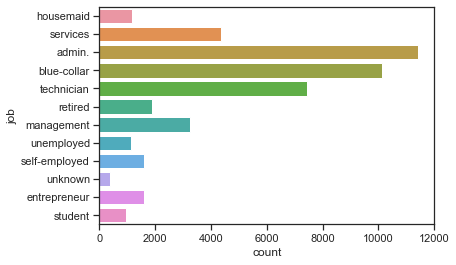

In [10]:
sns.countplot(y = 'job', data = data);

As we can see unknown are a small part of the set, for this reason, we should drop it

In [11]:
dict_job = { 'admin.' : 1,
            'blue-collar' : 2,
            'entrepreneur' : 3,
            'housemaid' : 4,
            'management' : 5,
            'retired' : 6,
            'self-employed' : 7,
            'services' : 8,
            'student' : 9,
            'technician' : 10,
            'unemployed' : 11,
            'unknown' : np.nan}

dict_x(dict_job, 'job')

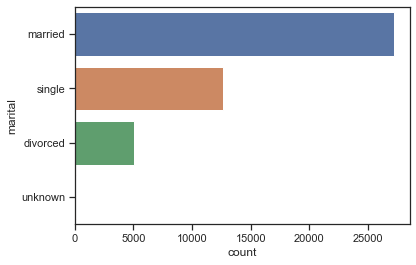

In [12]:
sns.countplot(y = 'marital', data = data);

As we can see unknown are a small part of the set, for this reason, we should drop it

In [13]:
dict_marital = {'divorced' : 1,
                'married' : 2,
                'single' : 3,
                'unknown' : np.nan}

dict_x(dict_marital, 'marital')

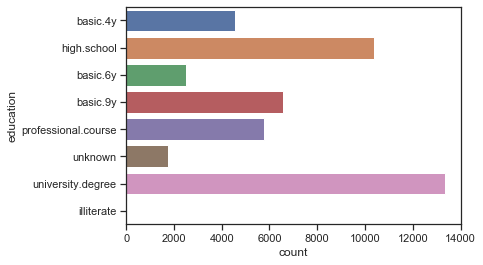

In [14]:
sns.countplot(y = 'education', data = data);

As we can see illiterate are a small part of the set, for this reason, we should drop it

In [15]:
dict_edu = {'basic.4y' : 1,
            'basic.6y': 2,
            'basic.9y' : 3,
            'high.school': 4,
            'illiterate' : np.nan,
            'professional.course' : 5,
            'university.degree' : 6,
            'unknown' : 7}

dict_x(dict_edu, 'education')

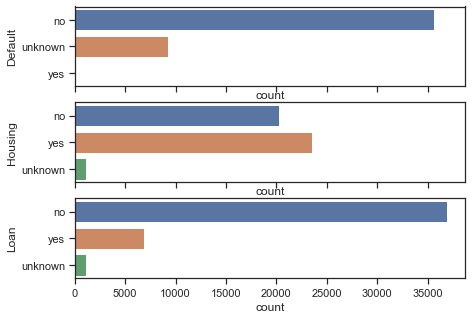

In [16]:
#That are atributtes we let's change to numerical data (1 or 0)
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

sns.countplot(y = 'default', data = data, palette = 'deep', ax = ax1)
ax1.set_ylabel("Default")

sns.countplot(y = 'housing', data = data, palette = 'deep', ax = ax2)
ax2.set_ylabel("Housing")


sns.countplot(y = 'loan', data = data, palette = 'deep', ax = ax3)
ax3.set_ylabel("Loan");

In [17]:
#That's function change some atributes that be a object to numerical (0 or 1) and get dummies

def bank_dummies(data, column_name):
    dummies = pd.get_dummies(data[column_name], prefix = column_name)
    data = pd.concat([data, dummies], axis = 1)
    data.drop(column_name, axis = 1, inplace = True)
    
    return data

In [18]:
values = ['default', 'housing', 'loan']

for i in values:
    data = bank_dummies(data, i)

data.head()

,age,job,marital,education,contact,month,day_of_week,duration,campaign,pdays,...,y,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,4.0,2.0,1.0,telephone,may,mon,261,1,999,...,no,1,0,0,1,0,0,1,0,0
1,57,8.0,2.0,4.0,telephone,may,mon,149,1,999,...,no,0,1,0,1,0,0,1,0,0
2,37,8.0,2.0,4.0,telephone,may,mon,226,1,999,...,no,1,0,0,0,0,1,1,0,0
3,40,1.0,2.0,2.0,telephone,may,mon,151,1,999,...,no,1,0,0,1,0,0,1,0,0
4,56,8.0,2.0,4.0,telephone,may,mon,307,1,999,...,no,1,0,0,1,0,0,0,0,1


> ### Related with the last contact of the current campaign

These attributes is related with the last contact of the current campaign, so in this case, what we have to do it's just changes the attribute month, attribute day_of_week and attribute contact to numerial (0 to cellular or 1 to telephone) and drop the attribute duration, because it highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric).

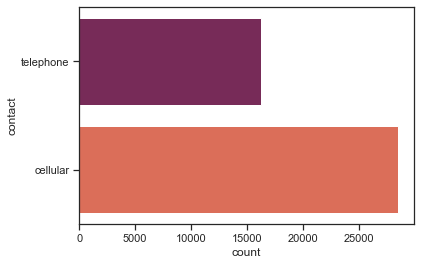

In [19]:
#Let's change attribute contact
sns.countplot(y = 'contact', data = data, palette = 'rocket');

In [20]:
dict_contact = {'cellular' : 0, 'telephone' : 1}
dict_x(dict_contact, 'contact')

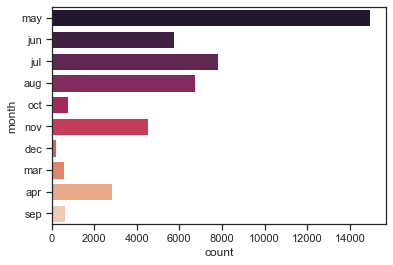

In [21]:
#Let's change the attribute month
sns.countplot(y = 'month', data = data, palette = 'rocket');

In [22]:
dict_months = {'mar' : 3, 
        'apr' : 4, 
        'may' : 5, 
        'jun' : 6,
        'jul' : 7, 
        'aug' : 8, 
        'sep' : 9,
        'oct' : 10, 
        'nov' : 11, 
        'dec' : np.nan}

dict_x(dict_months, 'month')

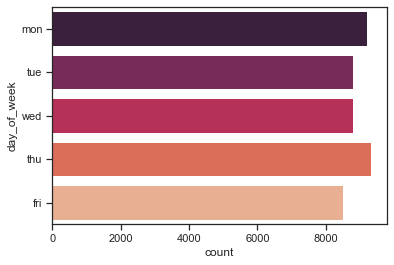

In [23]:
#Let's change the attribute day_of_week
sns.countplot(y = 'day_of_week', data = data, palette = 'rocket');

In [24]:
dict_day = {'mon' : 1, 
            'tue' : 2, 
            'wed' : 3, 
            'thu' : 4, 
            'fri' : 5}

dict_x(dict_day, 'day_of_week')

In [25]:
#Let's drop it
data.drop('duration', axis = 1, inplace = True)
data.head()

,age,job,marital,education,contact,month,day_of_week,campaign,pdays,previous,...,y,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,4.0,2.0,1.0,1,5.0,1,1,999,0,...,no,1,0,0,1,0,0,1,0,0
1,57,8.0,2.0,4.0,1,5.0,1,1,999,0,...,no,0,1,0,1,0,0,1,0,0
2,37,8.0,2.0,4.0,1,5.0,1,1,999,0,...,no,1,0,0,0,0,1,1,0,0
3,40,1.0,2.0,2.0,1,5.0,1,1,999,0,...,no,1,0,0,1,0,0,1,0,0
4,56,8.0,2.0,4.0,1,5.0,1,1,999,0,...,no,1,0,0,1,0,0,0,0,1


> ### Campaign attributes

In the campaign attributes, when we see to poutcome can percept there is so much nonexistent values, that don't worth to us predict. Then, we have to drop all them.

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

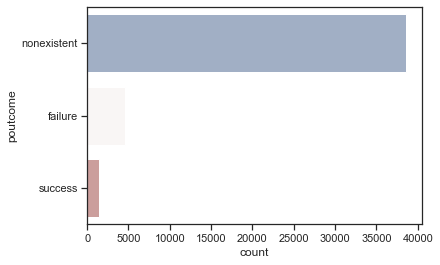

In [26]:
sns.countplot(y = 'poutcome', data = data, palette = 'vlag');

The poutcome attributes has so much nonexistent value, so it's worth to drop all the values from campaign

In [27]:
data.drop(['campaign', 'pdays', 'previous', 'poutcome'], axis = 1, inplace = True)

> ### Social and economic context attributes

In this case, we have to change just the columns name

- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

In [28]:
dict_sae = {'emp.var.rate' : 'emp_var_rate_quarterly', 
            'cons.price.idx' : 'cons_price_idx_monthly', 
            'cons.conf.idx' : 'cons_conf_idx_monthly', 
            'euribor3m' : 'euribor_3months', 
            'nr.employed' : 'num_employed_quarterly'}

data.rename(columns = dict_sae, inplace = True)

> ### Output variable

Finally, in this attribute we have just to change the values (yes or no) to (1 or 0)

- y: has the client subscribed a term deposit? (binary: 'yes','no')

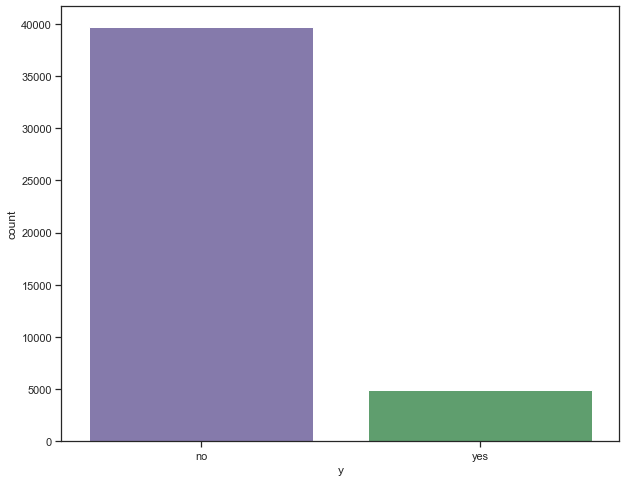

In [29]:
fig = plt.subplots(figsize=(10,8))

sns.countplot(x = 'y', data = data, palette = ['m', 'g']);

In [30]:
data['y'].replace({'yes': 1, 'no' : 0}, inplace = True)

In [31]:
data.head()
data.columns

,age,job,marital,education,contact,month,day_of_week,emp_var_rate_quarterly,cons_price_idx_monthly,cons_conf_idx_monthly,...,y,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,4.0,2.0,1.0,1,5.0,1,1.1,93.994,-36.4,...,0,1,0,0,1,0,0,1,0,0
1,57,8.0,2.0,4.0,1,5.0,1,1.1,93.994,-36.4,...,0,0,1,0,1,0,0,1,0,0
2,37,8.0,2.0,4.0,1,5.0,1,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,1,0,0
3,40,1.0,2.0,2.0,1,5.0,1,1.1,93.994,-36.4,...,0,1,0,0,1,0,0,1,0,0
4,56,8.0,2.0,4.0,1,5.0,1,1.1,93.994,-36.4,...,0,1,0,0,1,0,0,0,0,1


Index(['age', 'job', 'marital', 'education', 'contact', 'month', 'day_of_week',
       'emp_var_rate_quarterly', 'cons_price_idx_monthly',
       'cons_conf_idx_monthly', 'euribor_3months', 'num_employed_quarterly',
       'y', 'default_no', 'default_unknown', 'default_yes', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes'],
      dtype='object')

## Machine Learning

Well, our goal here it's predict if the client will subscribe or not will. For this, we let's use some machine learning classifications models to does this task.

In [32]:
#machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#split train and test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#evaluation metrics for machine learning models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [33]:
#target
y = data['y']

#drop feature target
data.drop('y', axis = 1, inplace = True)

#features
X = data.copy()

In [34]:
#Let's split data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((31245, 21), (13391, 21), (31245,), (13391,))

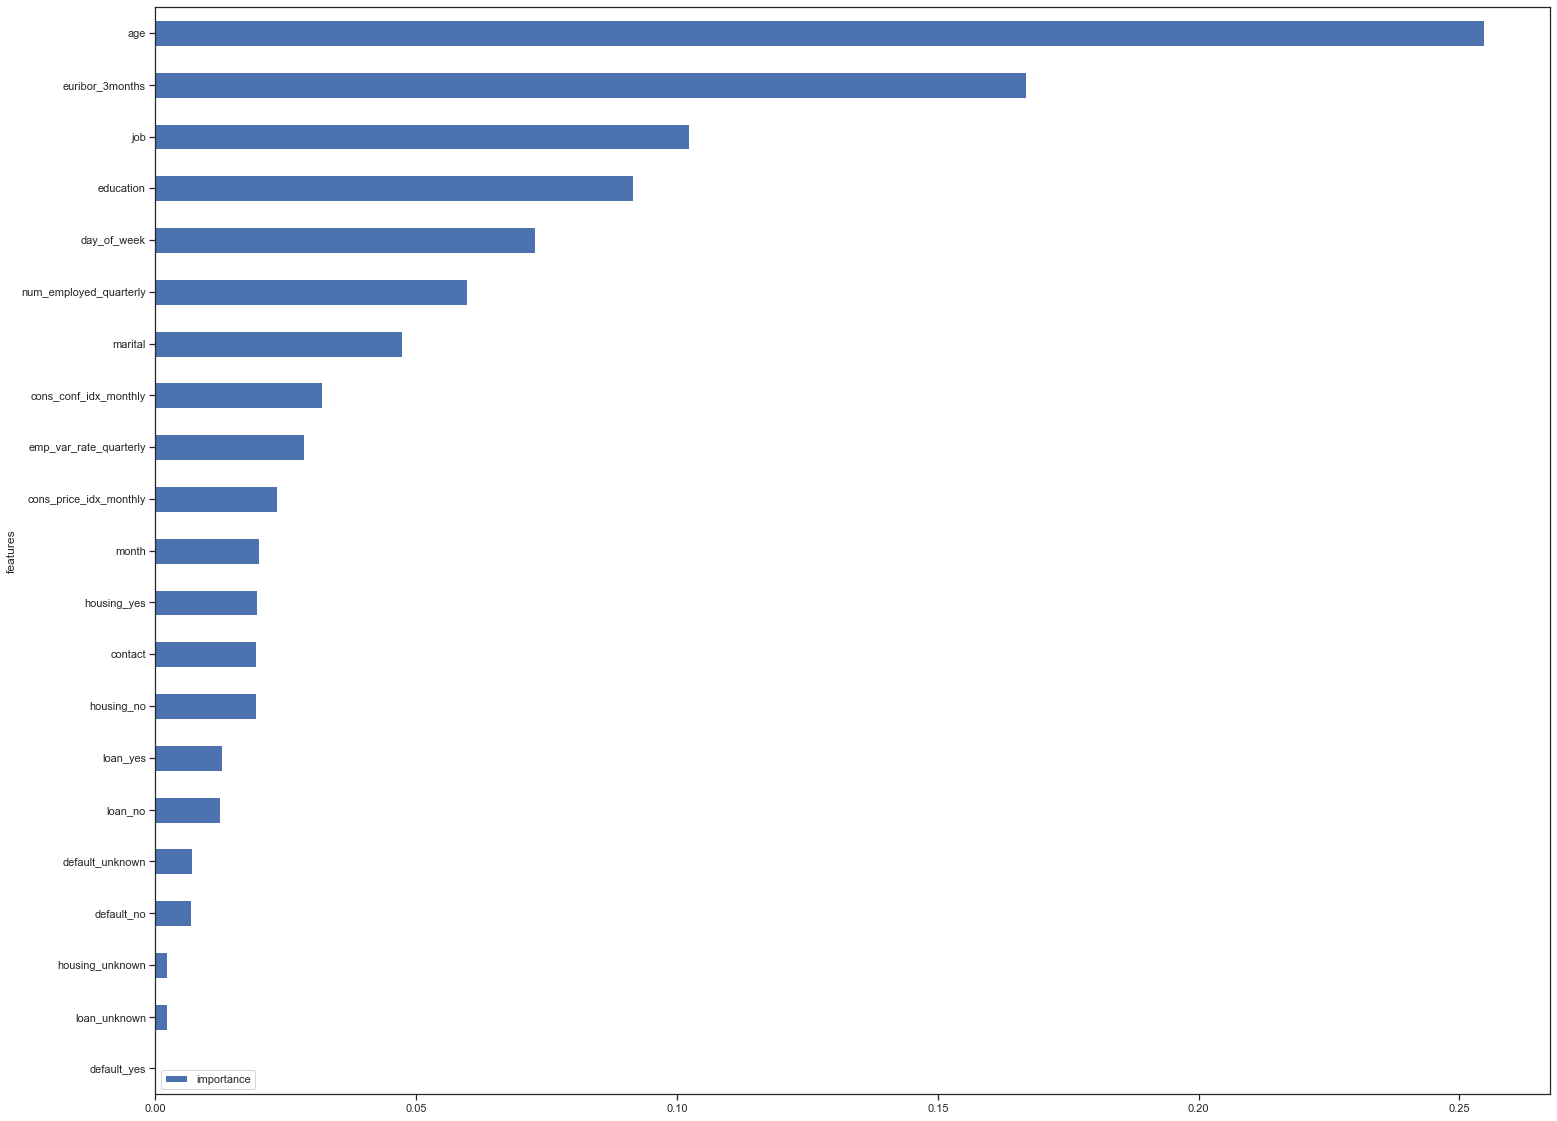

In [35]:
#creating the first model to extract the best features
first_model = RandomForestClassifier(n_estimators=50, max_features='sqrt')
first_model = first_model.fit(X_train, y_train)

best_features = pd.DataFrame()
best_features['features'] = X_train.columns
best_features['importance'] = first_model.feature_importances_
best_features.sort_values(by = 'importance', ascending = True, inplace = True)
best_features.set_index('features', inplace = True)
best_features.plot(kind='barh', figsize=(25, 20));

In [36]:
#drop the worst features
features_drop = ['default_yes', 'loan_unknown', 'housing_unknown', 'default_unknown', 'default_no']

X.drop(features_drop, axis = 1, inplace = True)

In [37]:
#Now, let's split data into training reduced and validation reduced 
X_train_red, X_valid_red, y_train_red, y_valid_red = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train_red.shape, X_valid_red.shape, y_train_red.shape, y_valid_red.shape

((31245, 16), (13391, 16), (31245,), (13391,))

In [38]:
#machine learning models will be used
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier(n_estimators=100)
gboost = GradientBoostingClassifier()
bayes = GaussianNB()
svc = SVC()

models = [logreg, logreg_cv, rf, gboost, bayes, svc]

In [39]:
#training all machine learning models
fits = []

for model in models:
    fits.append(model.fit(X_train_red, y_train_red))
    print('{0} : OK'.format(model.__class__))

<class 'sklearn.linear_model.logistic.LogisticRegression'> : OK
<class 'sklearn.linear_model.logistic.LogisticRegressionCV'> : OK
<class 'sklearn.ensemble.forest.RandomForestClassifier'> : OK
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> : OK
<class 'sklearn.naive_bayes.GaussianNB'> : OK
<class 'sklearn.svm.classes.SVC'> : OK


In [40]:
#predicts of all models
predicts = []

for i in fits:
    predicts.append(i.predict(X_valid_red))

In [42]:
#Confusion Matrix
model_names = ['LogisticRegression', 'LogisticRegressionCV', 
               'RandomForestClassifier', 'GradientBoostingClassifier', 'GaussianNB', 'SVC']
i = 0
for predict in predicts:
    print('{0}'.format(model_names[i]))
    print(confusion_matrix(y_valid, predict))
    print('*****')
    i += 1

LogisticRegression
[[11714   206]
 [ 1221   250]]
*****
LogisticRegressionCV
[[11781   139]
 [ 1276   195]]
*****
RandomForestClassifier
[[11448   472]
 [  921   550]]
*****
GradientBoostingClassifier
[[11718   202]
 [ 1131   340]]
*****
GaussianNB
[[8895 3025]
 [ 447 1024]]
*****
SVC
[[11739   181]
 [ 1162   309]]
*****


In [43]:
#No = did not sign a term bank deposit  ,  Yes = signed a term bank deposit
target_names = ['No', 'Yes']


#Classification Report
i = 0
for predict in predicts:
    print('{0}'.format(model_names[i]))
    print(classification_report(y_valid, predict, target_names = target_names))
    print('*****')
    i += 1

LogisticRegression
              precision    recall  f1-score   support

          No       0.91      0.98      0.94     11920
         Yes       0.55      0.17      0.26      1471

    accuracy                           0.89     13391
   macro avg       0.73      0.58      0.60     13391
weighted avg       0.87      0.89      0.87     13391

*****
LogisticRegressionCV
              precision    recall  f1-score   support

          No       0.90      0.99      0.94     11920
         Yes       0.58      0.13      0.22      1471

    accuracy                           0.89     13391
   macro avg       0.74      0.56      0.58     13391
weighted avg       0.87      0.89      0.86     13391

*****
RandomForestClassifier
              precision    recall  f1-score   support

          No       0.93      0.96      0.94     11920
         Yes       0.54      0.37      0.44      1471

    accuracy                           0.90     13391
   macro avg       0.73      0.67      0.69     13391

## Conclusion

As we can see have great models for each type of situation. In this case I will consider as the best model the one with the best F1-Score and the best Accuracy. Therefore, the best model machine learning is RandomForestClassifier. However, everything depends of business problem, sometimes is better the model has a great recall or has a great precision.
My goal was to predict if the client will subscribe a bank term deposit (yes or no), proposing the best models for each situation desired by the organization.